
- https://www.tensorflow.org/hub/tutorials/tf2_text_classification

This notebook classifies movie reviews as positive or negative using the text of the review. This is an example of binary—or two-class—classification, an important and widely applicable kind of machine learning problem.

In [2]:
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

In [3]:
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.4.1
Eager mode:  True
Hub version:  0.11.0
GPU is NOT AVAILABLE


In [4]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], 
                                  batch_size=-1, as_supervised=True)


In [5]:
train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

In [6]:
look_up_size = 5

In [7]:
print(train_examples[0:look_up_size])

[b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
 b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development w

In [8]:
print(train_labels[0:look_up_size])

[0 0 0 1 1]


In [9]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423195 , -0.0119017 ,  0.06337538,  0.06862972, -0.16776837,
        -0.10581174,  0.16865303, -0.04998824, -0.31148055,  0.07910346,
         0.15442263,  0.01488662,  0.03930153,  0.19772711, -0.12215476,
        -0.04120981, -0.2704109 , -0.21922152,  0.26517662, -0.80739075,
         0.25833532, -0.3100421 ,  0.28683215,  0.1943387 , -0.29036492,
         0.03862849, -0.7844411 , -0.0479324 ,  0.4110299 , -0.36388892,
        -0.58034706,  0.30269456,  0.3630897 , -0.15227164, -0.44391504,
         0.19462997,  0.19528408,  0.05666234,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201318 , -0.04418665, -0.08550783,
        -0.55847436, -0.23336391, -0.20782952, -0.03543064, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862679,  0.7753425 , -0.07667089,
        -0.15752277,  0.01872335, -0.08169781, -0.3521876 ,  0.4637341 ,
        -0.08492756,  0.07166859, -0.00670817,  0.12686075, -0.19326553,
 

In [10]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1)) #classification of sentiment according to positive or negative one

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dense (Dense)                (None, 16)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

Create validation set

In [12]:
size_of_validation_set = 10000

In [13]:
x_val = train_examples[:size_of_validation_set]
partial_x_train = train_examples[size_of_validation_set:]

y_val = train_labels[:size_of_validation_set]
partial_y_train = train_labels[size_of_validation_set:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 24s 772ms/step - loss: 0.6991 - accuracy: 0.5357 - val_loss: 0.6364 - val_accuracy: 0.6983
Epoch 2/40
30/30 [==============================] - 21s 693ms/step - loss: 0.5986 - accuracy: 0.7407 - val_loss: 0.5254 - val_accuracy: 0.7783
Epoch 3/40
30/30 [==============================] - 21s 699ms/step - loss: 0.4635 - accuracy: 0.8355 - val_loss: 0.4219 - val_accuracy: 0.8287
Epoch 4/40
30/30 [==============================] - 21s 706ms/step - loss: 0.3361 - accuracy: 0.8876 - val_loss: 0.3551 - val_accuracy: 0.8541
Epoch 5/40
30/30 [==============================] - 22s 719ms/step - loss: 0.2461 - accuracy: 0.9207 - val_loss: 0.3219 - val_accuracy: 0.8662
Epoch 6/40
30/30 [==============================] - 22s 751ms/step - loss: 0.1766 - accuracy: 0.9485 - val_loss: 0.3062 - val_accuracy: 0.8717
Epoch 7/40
30/30 [==============================] - 22s 729ms/step - loss: 0.1304 - accuracy: 0.9652 - val_loss: 0.3029 - val_accuracy: 0.8747

In [15]:
results = model.evaluate(test_data, test_labels)

print(results)

782/782 [==============================] - 3s 3ms/step - loss: 0.6228 - accuracy: 0.8458
[0.6227833032608032, 0.8457599878311157]


In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

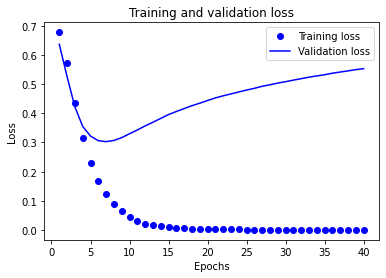

In [17]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

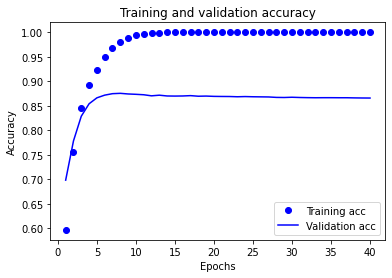

In [18]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
model2 = tf.keras.Sequential()
model2.add(hub_layer)
model2.add(tf.keras.layers.Dense(16, activation='relu'))
model2.add(tf.keras.layers.Dense(1)) #classification of sentiment according to positive or negative one

In [20]:
model2.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [21]:
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

history_dict2 = history2.history
history_dict2.keys()

Epoch 1/10
30/30 [==============================] - 21s 675ms/step - loss: 0.6793 - accuracy: 0.5837 - val_loss: 0.5410 - val_accuracy: 0.7917
Epoch 2/10
30/30 [==============================] - 20s 662ms/step - loss: 0.4230 - accuracy: 0.9567 - val_loss: 0.4214 - val_accuracy: 0.8623
Epoch 3/10
30/30 [==============================] - 20s 667ms/step - loss: 0.2662 - accuracy: 0.9929 - val_loss: 0.3477 - val_accuracy: 0.8697
Epoch 4/10
30/30 [==============================] - 20s 663ms/step - loss: 0.1677 - accuracy: 0.9961 - val_loss: 0.3149 - val_accuracy: 0.8726
Epoch 5/10
30/30 [==============================] - 20s 666ms/step - loss: 0.1075 - accuracy: 0.9983 - val_loss: 0.3046 - val_accuracy: 0.8747
Epoch 6/10
30/30 [==============================] - 20s 662ms/step - loss: 0.0735 - accuracy: 0.9987 - val_loss: 0.3027 - val_accuracy: 0.8755
Epoch 7/10
30/30 [==============================] - 20s 683ms/step - loss: 0.0537 - accuracy: 0.9990 - val_loss: 0.3066 - val_accuracy: 0.8752

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

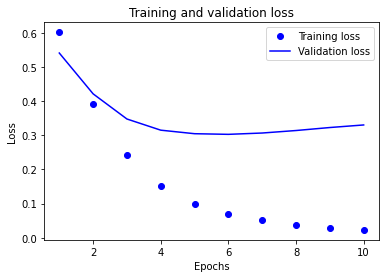

In [24]:
acc2 = history_dict2['accuracy']
val_acc2 = history_dict2['val_accuracy']
loss2 = history_dict2['loss']
val_loss2 = history_dict2['val_loss']

epochs2 = range(1, len(acc2) + 1)

# "bo" is for "blue dot"
plt.plot(epochs2, loss2, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

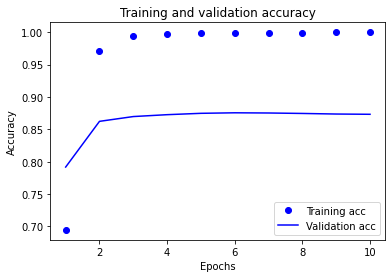

In [25]:
plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()